In [1]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
from tensorflow_examples.lite.model_maker.core.task.model_spec import mobilenet_v2_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import efficientnet_lite1_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

D:\anaconda\envs\tensorflowtest\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:44: UserWarning: You are currently using a nightly version of TensorFlow (2.3.0-dev20200515). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


In [2]:
#image_path = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True)

In [3]:
image_path = tf.keras.utils.get_file('fishes','C:/Users/Ting Feng/.keras/datasets/fishes')

In [4]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 40, num_label: 3, labels: bawal_emas, bawal_hitam, bawal_putih.


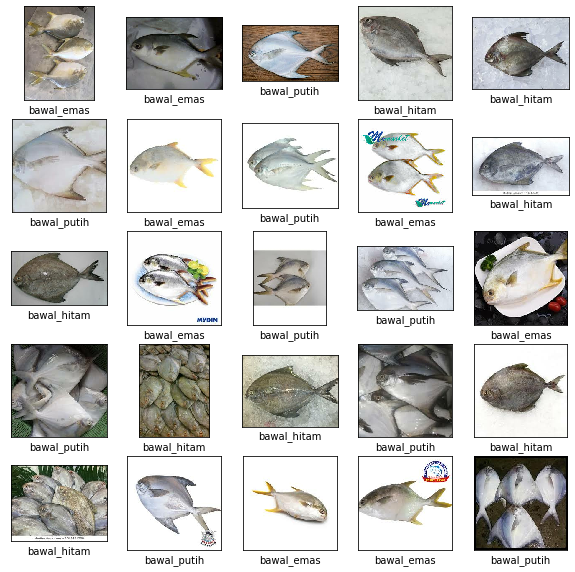

In [5]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [6]:
#inception_v3_spec = ImageModelSpec(uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4')
#inception_v3_spec.input_image_shape = [299, 299]

#model = image_classifier.create(train_data, model_spec=mobilenet_v2_spec, validation_data=validation_data, epochs=10)
model = image_classifier.create(train_data, model_spec=efficientnet_lite1_spec, validation_data=validation_data, epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 4,193,187
Trainable params: 3,843
Non-trainable params: 4,189,344
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Epoch 1/10
1/1 [==============================] - 0s 17ms/step - loss: 1.2980 - accuracy: 0.3438
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 1.2832 - accuracy: 0.3125
Epoch 3/10
1/1 [==============================] - 0s 21ms/step - loss: 1.1165 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 1.0497 - accuracy: 0.3750
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: 0.9072 - accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 0s 19ms/step - loss: 0.9379 - accuracy: 0.6250
Epoch 7/10
1/1 [==============================] - 0s 23ms/step - loss: 0.8784 - accuracy: 0.7188
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 0.8088 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 19ms/step - loss: 0.7558 - accuracy: 0.7188
Epoch 10/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6428 - accuracy: 0.8438


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 4,193,187
Trainable params: 3,843
Non-trainable params: 4,189,344
_________________________________________________________________


In [8]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.7500


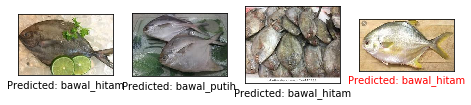

In [9]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [10]:
model.export(export_dir='.')

INFO:tensorflow:Saving labels in .\labels.txt.


INFO:tensorflow:Saving labels in .\labels.txt.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: C:\Users\TINGFE~1\AppData\Local\Temp\tmp1wzapwjc\assets


INFO:tensorflow:Assets written to: C:\Users\TINGFE~1\AppData\Local\Temp\tmp1wzapwjc\assets


In [11]:
# Read TensorFlow Lite model from TensorFlow Lite file.
with tf.io.gfile.GFile('model.tflite', 'rb') as f:
  model_content = f.read()

# Read label names from label file.
with tf.io.gfile.GFile('labels.txt', 'r') as f:
  label_names = f.read().split('\n')

# Initialze TensorFlow Lite inpterpreter.
interpreter = tf.lite.Interpreter(model_content=model_content)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

# Run predictions on each test image data and calculate accuracy.
accurate_count = 0
for i, (image, label) in enumerate(test_data.dataset):
    # Pre-processing should remain the same. Currently, just normalize each pixel value and resize image according to the model's specification.
    image, _ = model.preprocess(image, label)
    # Add batch dimension and convert to float32 to match with the model's input
    # data format.
    image = tf.expand_dims(image, 0).numpy()

    # Run inference.
    interpreter.set_tensor(input_index, image)
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the label with highest
    # probability.
    predict_label = np.argmax(output()[0])
    # Get label name with label index.
    predict_label_name = label_names[predict_label]

    accurate_count += (predict_label == label.numpy())

accuracy = accurate_count * 1.0 / test_data.size
print('TensorFlow Lite model accuracy = %.4f' % accuracy)

TensorFlow Lite model accuracy = 0.7500
